In [789]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize, fsolve
from scipy.special import roots_legendre
import scipy.linalg as la
import matplotlib.pyplot as plt
from FEM_1D import *
from tools import *
from shape_functions import *
# plt.style.use('default')
import copy
fontsize = 15

# xb=4/5 and a=0.5

In [790]:
num_elems = 4
domain = (0, 1)
p = 3
mesh = np.linspace(domain[0], domain[1], num_elems+1)
a = .5*1
xb = 0.8
if a == 50:
    U_init = 1.585854059271320
elif a == 0.5:
    U_init = 0.03559183822564316
exact_func = exact_fn(a = a, xb=xb)
rhs_func = rhs_fn(a=a, xb=xb)
BCs = (exact_func(domain[0]), exact_func(domain[-1]))


Shape class: linear, Number of elements: 4, Polynomial order:3,  Domain: (0, 1), Boundary conditions: (0.0, 0.0)


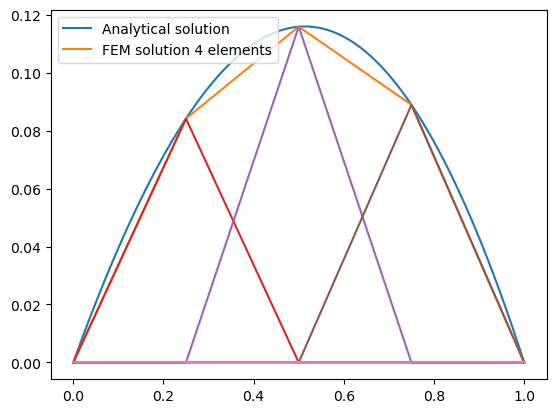

0.03340656074466737

In [791]:
U_l_test, phi_phip_l_test, uh_l_test, cont_K_l_test = FEM_1D(shape_class = linear,p=p, num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = True)
cal_energy(U_l_test, phi_phip_l_test)

Shape class: quadratic, Number of elements: 10, Polynomial order:3,  Domain: (0, 1), Boundary conditions: (0.0, 0.0)


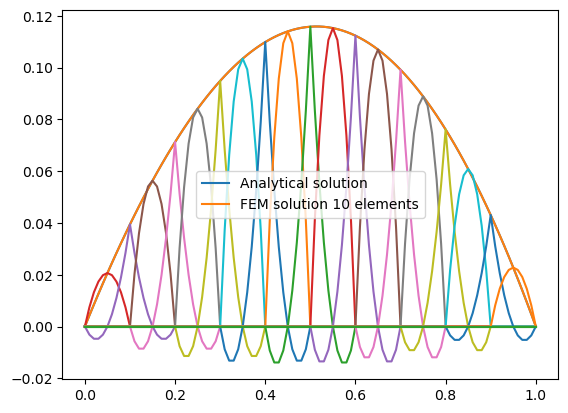

0.03559182991739081

In [792]:
num_elems = 10
U_q_test, phi_phip_q_test, uh_q_test, cont_K_q_test = FEM_1D(shape_class = quadratic,p=p, num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = True)
cal_energy(U_q_test, phi_phip_q_test)

Shape class: Hierarchical, Number of elements: 10, Polynomial order:3,  Domain: (0, 1), Boundary conditions: (0.0, 0.0)


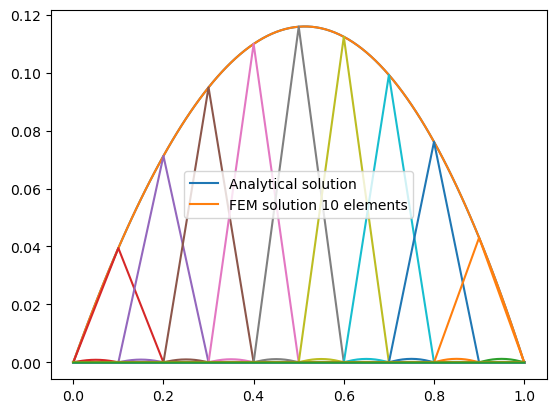

0.035591838276523596

In [793]:
U_l_test, phi_phip_l_test, uh_p_test, cont_K_p_test = FEM_1D(shape_class = Hierarchical,p=p, num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = True)
cal_energy(U_l_test, phi_phip_l_test)

# H-FEM

In [794]:
num_elems_list = [2, 4, 8, 16, 32]
domain = (0, 1)
mesh = np.linspace(domain[0], domain[1], num_elems+1)
a = .5*1
xb = 0.8
if a == 50:
    U_init = 1.585854059271320
elif a == 0.5:
    U_init = 0.03559183822564316
exact_func = exact_fn(a = a, xb=xb)
rhs_func = rhs_fn(a=a, xb=xb)
BCs = (exact_func(domain[0]), exact_func(domain[-1]))

energy_list_l = []
error_list_l = []
DOFs_l = []
solution_l = []
cont_K_list_l = []

energy_list_q = []
error_list_q = []
DOFs_q = []
solution_q = []
cont_K_list_q = []

for num_elems in num_elems_list:
    U_l, phi_phip_l, uh_l,cont_K_l = FEM_1D(shape_class = linear,num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_l = cal_energy(U_l, phi_phip_l)
    energy_list_l.append(energy_fem_l)
    error_l = np.sqrt(abs(energy_fem_l-U_init)/U_init)
    DOFs_l.append(len(U_l))
    error_list_l.append(error_l)
    solution_l.append(uh_l)
    cont_K_list_l.append(cont_K_l)
    
    U_q, phi_phip_q, uh_q, cont_K_q = FEM_1D(shape_class = quadratic,num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_q = cal_energy(U_q, phi_phip_q)
    energy_list_q.append(energy_fem_q)
    error_q = np.sqrt(abs(energy_fem_q-U_init)/U_init)
    DOFs_q.append(len(U_q))
    error_list_q.append(error_q)
    solution_q.append(uh_q)
    cont_K_list_q.append(cont_K_q)
print(energy_list_l)
print(energy_list_q)
print(U_init)

[0.026823085213187704, 0.03340656074466737, 0.03504593373143547, 0.035455387861326564, 0.035557727420926305]
[0.03558686846445962, 0.035591515017038444, 0.03559181787350276, 0.03559183704375187, 0.03559183835453883]
0.03559183822564316


# P_FEM

In [795]:
DOFs_p = []
error_list_p = []
solution_p = []
energy_list_p = []
cont_K_list_p = []
p_list = [1, 2, 3, 4, 5]

for p in p_list:
    U_p, phi_phip_p, uh_p, cont_K_p = FEM_1D(shape_class = Hierarchical,p = p, num_elems = 2, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_p = cal_energy(U_p, phi_phip_p)
    error_p = np.sqrt(abs(energy_fem_p-U_init)/U_init)
    energy_list_p.append(energy_fem_p)
    DOFs_p.append(len(U_p))
    error_list_p.append(error_p)
    solution_p.append(uh_p)
    cont_K_list_p.append(cont_K_p)
print(energy_list_p)

[0.026823085213187704, 0.0355868684644596, 0.03559179506689539, 0.03559183813686616, 0.0355918382288883]


linear

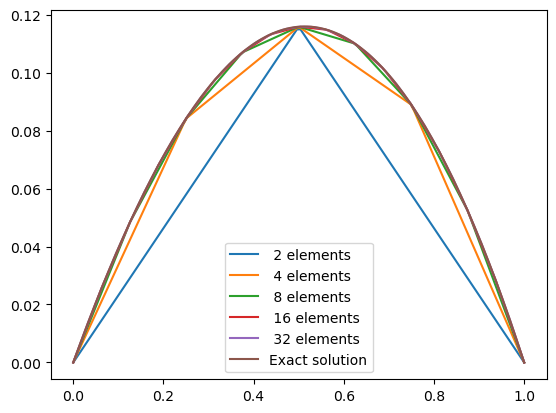

In [796]:
x_data = np.linspace(domain[0], domain[1], 128)
for idx in range(len(solution_l)):
    mesh_l = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_l = np.linspace(domain[0], domain[1], 128)
    plt.plot(mesh_l, solution_l[idx](mesh_l), label=' {} elements'.format(num_elems_list[idx]))
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend()

quadratic

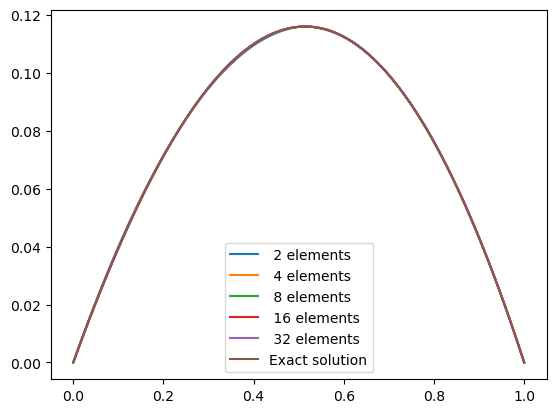

In [797]:
x_data = np.linspace(domain[0], domain[1], 128)
for idx in range(len(solution_q)):
    mesh_q = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_q = np.linspace(domain[0], domain[1], 128)

    plt.plot(mesh_q, solution_q[idx](mesh_q), label=' {} elements'.format(num_elems_list[idx]))
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend()

p_fem

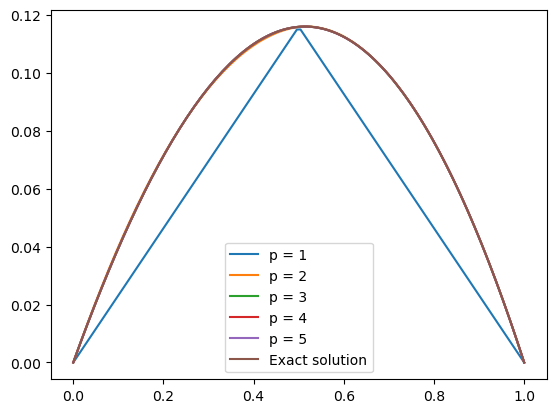

In [798]:
x_data = np.linspace(domain[0], domain[1], 128)
for idx in range(len(solution_p)):
    # mesh_p = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_p = np.linspace(domain[0], domain[1], 128)
    # print(mesh_l)s
    plt.plot(mesh_p, solution_p[idx](mesh_p), label='p = {} '.format(p_list[idx]))
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend()

In [799]:
print(np.log(error_list_l))
print(np.log(error_list_q))

[-0.70046087 -1.39518677 -2.08871379 -2.78195536 -3.47512872]
[-4.43824992 -5.80466448 -7.18722041 -8.61025548 -9.71818943]


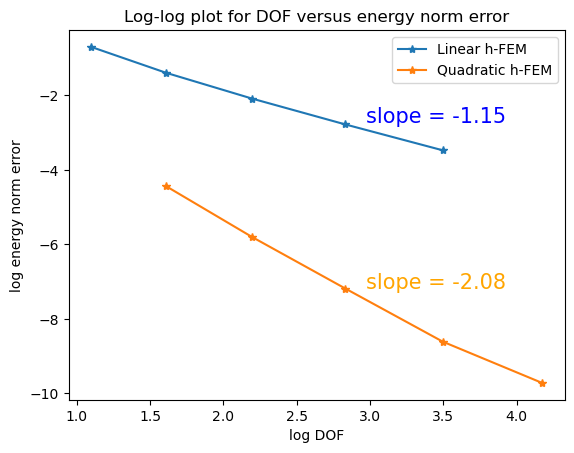

In [800]:
import numpy as np
import matplotlib.pyplot as plt

truncate = 0
log_DOFS_l = np.log(DOFs_l[truncate:])
log_error_list_l = np.log(error_list_l[truncate:])
log_DOFS_q = np.log(DOFs_q[truncate:])
log_error_list_q = np.log(error_list_q[truncate:])

plt.plot(log_DOFS_l, log_error_list_l, '*-', label='Linear h-FEM')
plt.plot(log_DOFS_q, log_error_list_q, '*-', label='Quadratic h-FEM')

# 计算斜率
slope_l, _ = np.polyfit(log_DOFS_l, log_error_list_l, 1)
slope_q, _ = np.polyfit(log_DOFS_q, log_error_list_q, 1)

# 标注斜率
plt.annotate(f'slope = {slope_l:.2f}', xy=(0.6, 0.75), xycoords='axes fraction', color='blue', fontsize = fontsize)
plt.annotate(f'slope = {slope_q:.2f}', xy=(0.6, 0.3), xycoords='axes fraction', color='orange',fontsize = fontsize)

plt.xlabel('log DOF')
plt.ylabel('log energy norm error')
plt.title('Log-log plot for DOF versus energy norm error')
plt.legend()
plt.show()



In [801]:

def posterior_energy(energy_list_array, DOFs_array, slope):
    if len(energy_list_array)<3:
        raise AssertionError("The value of energy should be greater than three!")
    elif len(energy_list_array)!= len(DOFs_array):
        raise AssertionError("The number of energy values should be equal to the number of DOFs!")
    def equation(U, U0, U1, U2, Q):
        # return ((U-U0)/(U-U1) - ((U-U1)/(U-U2))**Q)**2
        return (np.log(np.abs((U-U0)/(U-U1))) / ( Q * np.log(np.abs((U-U1)/(U-U2))))-1)**2

    Bh = abs(slope)
    i = 0
    U_list = []
    while i+3 <= len(energy_list_array):
        U0, U1, U2 = energy_list_array[i:i+3]
        h0, h1, h2 = 1/np.sqrt(DOFs_array[i:i+3])
        # print(h0, h1, h2)
        N0, N1, N2 = DOFs_array[i:i+3]
        # Q = np.log((h0/h1))/np.log((h1/h2))
        Q = np.log((N1/N0))/np.log((N2/N1))
        initial_guess = np.mean(energy_list_array)
        # Use minimize
        lower_bound = min(energy_list_array[i:i+3])
        upper_bound = max(energy_list_array[i:i+3])

        bounds = [(lower_bound*1, upper_bound*2.)]

        U_solution = minimize(equation, initial_guess, args=(U0, U1, U2, Q), bounds=bounds).x
        # U_solution =fsolve(equation, initial_guess, args=(U0, U1, U2, Q)) 

        U_list.append(U_solution )
        i+=1
    return np.mean(U_list)


In [802]:
# def posterior_energy(energy_list_array, DOFs_array, slope):
#     if len(energy_list_array)<3:
#         raise AssertionError("The value of energy should be greater than three!")
#     elif len(energy_list_array)!= len(DOFs_array):
#         raise AssertionError("The number of energy values should be equal to the number of DOFs!")

#     Bh = abs(slope)
#     i = 0
#     U_list = []
#     while i+3 < len(energy_list_array):
#         U0, U1, U2 = energy_list_array[i:i+3]
#         h0, h1, h2 = 1/np.sqrt(DOFs_array[i:i+3])
#         Q = np.log((h0/h1))/np.log((h1/h2))
#         lhs = lambda U: np.log(abs((U-U0)/(U-U1)))/np.log(abs((U-U1)/(U-U2)))
#         initial_guess = np.mean(energy_list_array[1:])
#         result = minimize(lhs, initial_guess)
#         U_list.append(result.x)
#         i+=1
#     return np.mean(U_list)

U_post_l = posterior_energy(energy_list_l, DOFs_l, slope_l)
print('Energy for linear h-FEM', U_post_l)
print('Error for a posterior estimate for linear h-FEM', abs(U_init-U_post_l)/U_init*100)
U_post_q = posterior_energy(energy_list_q, DOFs_q, slope_q)
print('Energy for quadratic FEM', U_post_q)
print('Error for a posterior estimate for quadratic h-FEM', abs(U_init-U_post_q)/U_init*100)



Energy for linear h-FEM 0.034626674393444835
Error for a posterior estimate for linear h-FEM 2.7117560663189972
Energy for quadratic FEM 0.03559172626641006
Error for a posterior estimate for quadratic h-FEM 0.0003145643458760506


/var/folders/hd/mc7xhwh55r3c7crzjnccdypr0000gn/T/ipykernel_28641/3599711962.py:8: RuntimeWarning: divide by zero encountered in log
  return (np.log(np.abs((U-U0)/(U-U1))) / ( Q * np.log(np.abs((U-U1)/(U-U2))))-1)**2


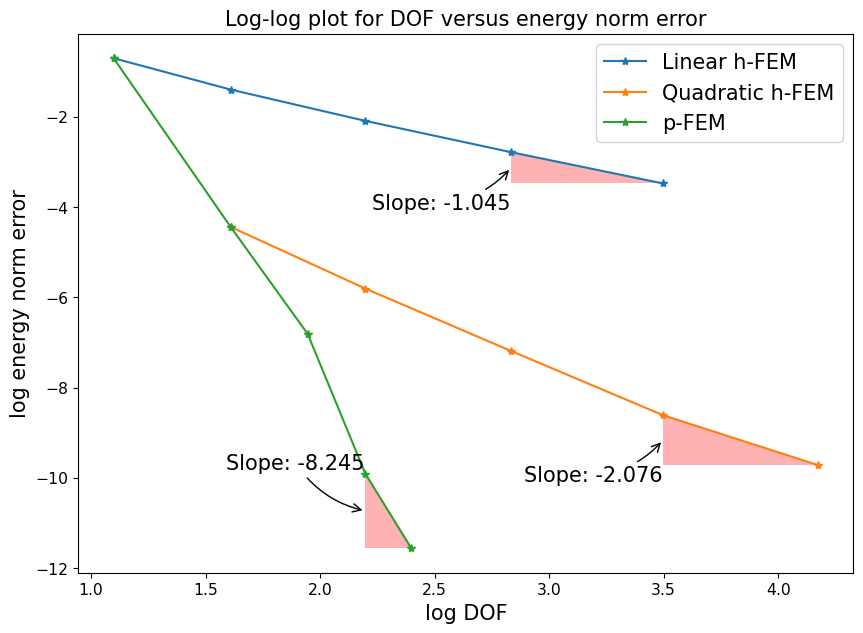

In [803]:
# Modify the provided code to display the slopes and a triangle for slope representation
truncate = 0

# Calculate slopes for Linear and Quadratic h-FEM and p-FEM
slope_l = (np.log(error_list_l[-1]) - np.log(error_list_l[-2])) / (np.log(DOFs_l[-1]) - np.log(DOFs_l[-2]))
slope_q = (np.log(error_list_q[-1]) - np.log(error_list_q[-2])) / (np.log(DOFs_q[-1]) - np.log(DOFs_q[-2]))
slope_p = (np.log(error_list_p[-1]) - np.log(error_list_p[-2])) / (np.log(DOFs_p[-1]) - np.log(DOFs_p[-2]))
# Modify the provided code to display the slopes and triangles for slope representation for all methods
plt.figure(figsize=(10, 7))
slope_q, _ = np.polyfit(log_DOFS_q, log_error_list_q, 1)
# Plot the data
plt.plot(np.log(DOFs_l[truncate:]), np.log(error_list_l[truncate:]), '*-', label='Linear h-FEM')
plt.plot(np.log(DOFs_q[truncate:]), np.log(error_list_q[truncate:]), '*-', label='Quadratic h-FEM')
plt.plot(np.log(DOFs_p[truncate:]), np.log(error_list_p[truncate:]), '*-', label='p-FEM')

# Function to draw triangle and annotate slope
def draw_triangle_and_annotate(DOFs, error_list, slope, label_offset=(-100, -30)):
    triangle_x = [np.log(DOFs[-2]), np.log(DOFs[-2]), np.log(DOFs[-1])]
    triangle_y = [np.log(error_list[-2]), np.log(error_list[-1]), np.log(error_list[-1])]
    plt.fill(triangle_x, triangle_y, 'r', alpha=0.3) # Fill the triangle with red color and some transparency
    plt.annotate(f"Slope: {slope:.3f}", 
                 xy=(triangle_x[1], (triangle_y[0]+triangle_y[1])/2), 
                 xycoords='data',
                 xytext=label_offset, 
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), fontsize=fontsize)

# Draw triangles and annotate for each method
draw_triangle_and_annotate(DOFs_l, error_list_l, slope_l)
draw_triangle_and_annotate(DOFs_q, error_list_q, slope_q)
draw_triangle_and_annotate(DOFs_p, error_list_p, slope_p, label_offset=(-100, 30))

# Labels, title, and legend
plt.xlabel('log DOF', fontsize=fontsize)
plt.ylabel('log energy norm error', fontsize=fontsize)
plt.xticks(fontsize = 0.75*fontsize)
plt.yticks(fontsize = 0.75*fontsize)
plt.title('Log-log plot for DOF versus energy norm error',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.savefig('/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_2D/images/Q1/h_p_error.png')

plt.show()


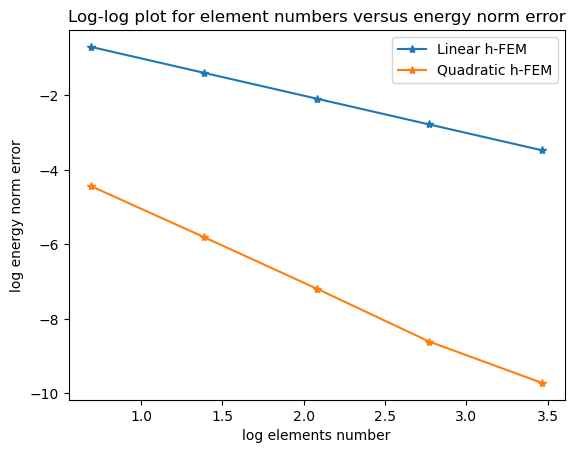

In [804]:
truncate = 0
plt.plot(np.log(num_elems_list[truncate:]), np.log(error_list_l[truncate:]), '*-', label='Linear h-FEM')
plt.plot(np.log(num_elems_list[truncate:]), np.log(error_list_q[truncate:]), '*-', label='Quadratic h-FEM')
plt.xlabel('log elements number')
plt.ylabel('log energy norm error')
plt.title('Log-log plot for element numbers versus energy norm error')
plt.legend()
plt.show()

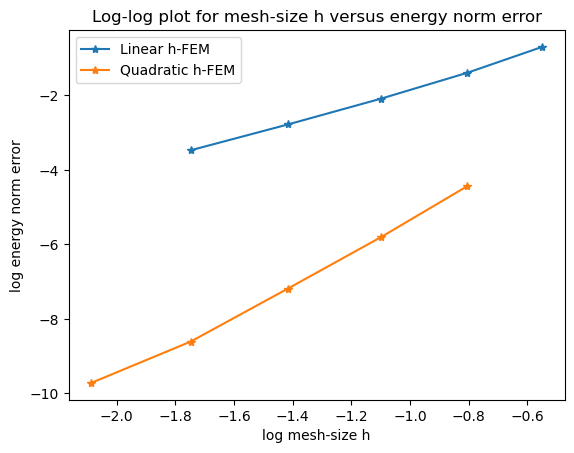

In [805]:
# 计算 h 的值
h_values_l = 1 / np.sqrt(DOFs_l[truncate:])
h_values_q = 1 / np.sqrt(DOFs_q[truncate:])

plt.plot(np.log(h_values_l), np.log(error_list_l[truncate:]), '*-', label='Linear h-FEM')
plt.plot(np.log(h_values_q), np.log(error_list_q[truncate:]), '*-', label='Quadratic h-FEM')
plt.xlabel('log mesh-size h')
plt.ylabel('log energy norm error')
plt.title('Log-log plot for mesh-size h versus energy norm error')
plt.legend()
plt.show()


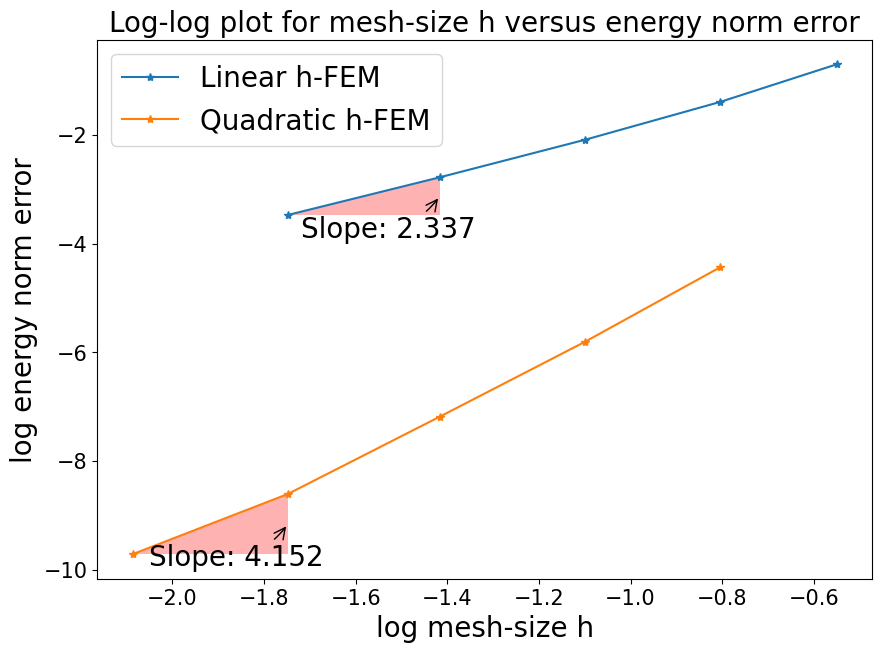

In [806]:
import matplotlib.pyplot as plt
fontsize=20
log_h_values_l = np.log(h_values_l)
log_error_list_l = np.log(error_list_l[truncate:])
log_h_values_q = np.log(h_values_q)
log_error_list_q = np.log(error_list_q[truncate:])

rates_l = (log_error_list_l[1:] - log_error_list_l[:-1]) / (log_h_values_l[1:] - log_h_values_l[:-1])
average_rate_l = np.mean(rates_l)
slope_l = (np.log(error_list_l[-1]) - np.log(error_list_l[-2])) / (np.log(h_values_l[-1]) - np.log(h_values_l[-2]))
slope_q, _ = np.polyfit(log_h_values_q, log_error_list_q, 1)
rates_q = (log_error_list_q[1:] - log_error_list_q[:-1]) / (log_h_values_q[1:] - log_h_values_q[:-1])
average_rate_q = np.mean(rates_q)

average_rate_l, average_rate_q
# Plot the data
plt.figure(figsize=(10, 7))
plt.plot(log_h_values_l, log_error_list_l, '*-', label='Linear h-FEM')
plt.plot(log_h_values_q, log_error_list_q, '*-', label='Quadratic h-FEM')
# plt.plot(log_h_values_l, log_error_list_l, '*-', label='Linear h-FEM')
# plt.plot(log_h_values_q, log_error_list_q, '*-', label='Quadratic h-FEM')
draw_triangle_and_annotate(h_values_l, error_list_l, average_rate_l)
draw_triangle_and_annotate(h_values_q, error_list_q, slope_q)
# # Annotate with the rate of convergence
# mid_index_l = len(log_h_values_l) // 2
# mid_point_l = (log_h_values_l[mid_index_l], log_error_list_l[mid_index_l])
# plt.annotate(f"Convergence, Rate: {average_rate_l:.3f}", 
#              xy=mid_point_l, 
#              xycoords='data',
#              xytext=(-100, -30), 
#              textcoords='offset points',
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), fontsize = fontsize)

# # For Quadratic h-FEM
# mid_index_q = len(log_h_values_q) // 2
# mid_point_q = (log_h_values_q[mid_index_q], log_error_list_q[mid_index_q])
# plt.annotate(f"Convergence Rate: {average_rate_q:.3f}", 
#              xy=mid_point_q, 
#              xycoords='data',
#              xytext=(-100, -30), 
#              textcoords='offset points',
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), fontsize = fontsize)


# Labels, title, and legend
plt.xlabel('log mesh-size h', fontsize = fontsize)
plt.ylabel('log energy norm error', fontsize = fontsize)
plt.xticks(fontsize = 0.75*fontsize)
plt.yticks(fontsize = 0.75*fontsize)
plt.title('Log-log plot for mesh-size h versus energy norm error', fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.savefig('/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_2D/images/Q1/logmeshsize.png')
plt.show()

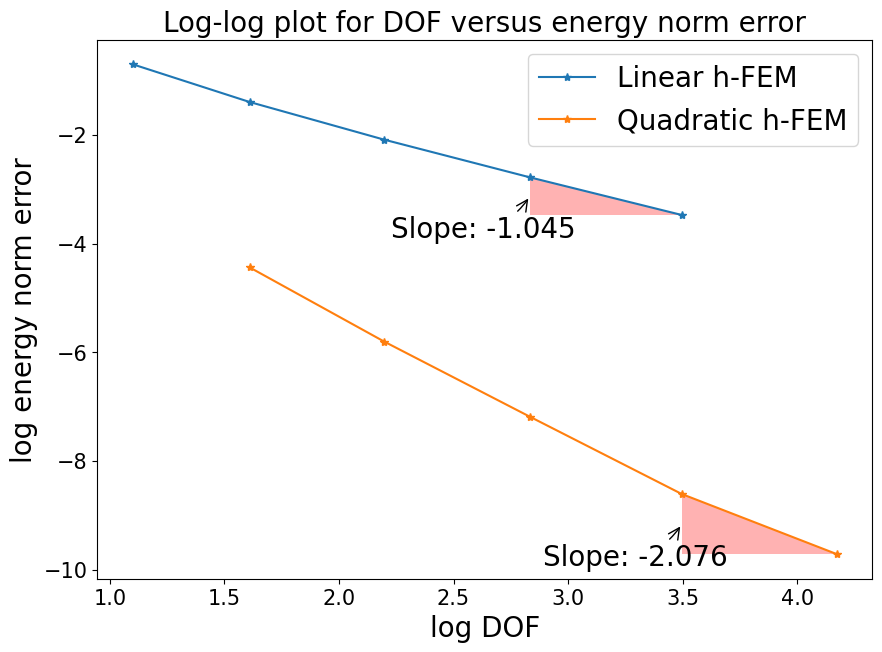

In [807]:
import numpy as np
import matplotlib.pyplot as plt

# ... [Your definitions for DOFs_l, DOFs_q, error_list_l, error_list_q, and fontsize here] ...

# Modify the provided code to display the rates of convergence
truncate = 0

# Calculate terminal rates of convergence for Linear and Quadratic h-FEM
rate_l = (np.log(error_list_l[-1]) - np.log(error_list_l[-2])) / (np.log(DOFs_l[-1]) - np.log(DOFs_l[-2]))
rate_q = (np.log(error_list_q[-1]) - np.log(error_list_q[-2])) / (np.log(DOFs_q[-1]) - np.log(DOFs_q[-2]))

slope_q, _ = np.polyfit(np.log(DOFs_q), log_error_list_q, 1)
plt.figure(figsize=(10, 7))

# Plot the data
plt.plot(np.log(DOFs_l[truncate:]), np.log(error_list_l[truncate:]), '*-', label='Linear h-FEM')
plt.plot(np.log(DOFs_q[truncate:]), np.log(error_list_q[truncate:]), '*-', label='Quadratic h-FEM')
draw_triangle_and_annotate(DOFs_l, error_list_l, rate_l)
draw_triangle_and_annotate(DOFs_q, error_list_q, slope_q)
# Annotate with the rate of convergence on each line
# mid_index_l = len(DOFs_l[truncate:]) // 2
# mid_point_l = (np.log(DOFs_l[truncate:][mid_index_l]), np.log(error_list_l[truncate:][mid_index_l]))
# plt.annotate(f"Convergence Rate: {rate_l:.3f}", 
#              xy=mid_point_l, 
#              xycoords='data',
#              xytext=(-100,-40), 
#              textcoords='offset points',
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), fontsize = fontsize)


# mid_index_q = len(DOFs_q[truncate:]) // 2
# mid_point_q = (np.log(DOFs_q[truncate:][mid_index_q]), np.log(error_list_q[truncate:][mid_index_q]))
# plt.annotate(f"Convergence Rate: {rate_q:.3f}", 
#              xy=mid_point_q, 
#              xycoords='data',
#              xytext=(-100, -30), 
#              textcoords='offset points',
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), fontsize = fontsize)


# Labels, title, and legend
plt.xlabel('log DOF', fontsize=fontsize)
plt.xticks(fontsize = 0.75*fontsize)
plt.yticks(fontsize = 0.75*fontsize)
plt.ylabel('log energy norm error', fontsize=fontsize)
plt.title('Log-log plot for DOF versus energy norm error', fontsize=fontsize)
plt.legend(fontsize=fontsize)

plt.savefig('/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_2D/images/Q1/logDOF.png')
plt.show()


In [808]:
print(min(error_list_l),min(error_list_q))

0.03095784868383875 6.017886022041664e-05


In [809]:
# bugs

# xb=4/5 and a=50

quadratic

[52.50697096166245, 214.6024898752957, 863.0534278959993, 3456.874567048271]


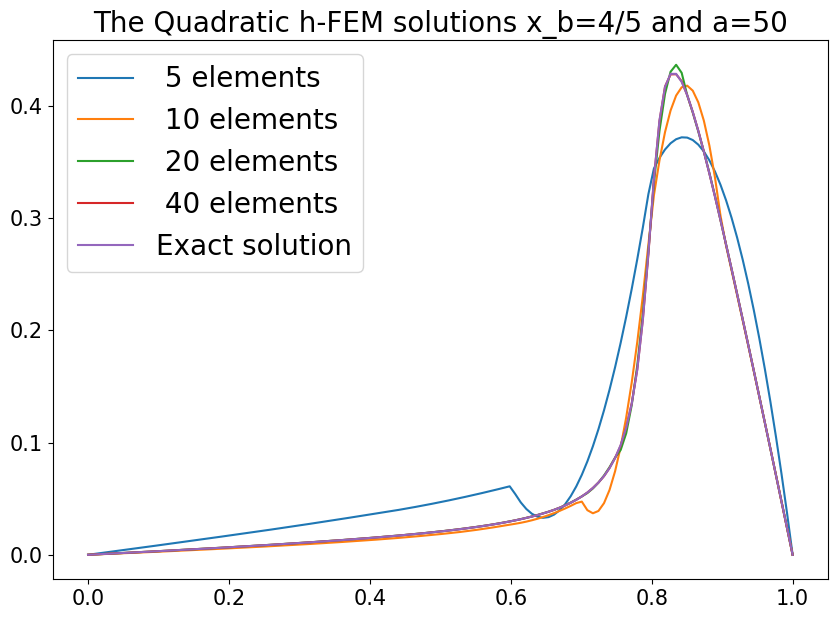

In [810]:
num_elems_list = [5, 10, 20, 40]
domain = (0, 1)
mesh = np.linspace(domain[0], domain[1], num_elems+1)
a = 50
xb = 0.8
if a == 50:
    U_init = 1.585854059271320
elif a == 0.5:
    U_init = 0.03559183822564316
exact_func = exact_fn(a = a, xb=xb)
rhs_func = rhs_fn(a=a, xb=xb)
BCs = (exact_func(domain[0]), exact_func(domain[-1]))

error_list_q = []
DOFs_q = []
solution_q = []
cont_K_list_q = []
for num_elems in num_elems_list:

    U_q, phi_phip_q, uh_q, cont_K_q = FEM_1D(shape_class = quadratic,num_elems = num_elems, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_q = cal_energy(U_q, phi_phip_q)
    error_q = np.sqrt(abs(energy_fem_q-U_init)/U_init)
    DOFs_q.append(len(U_q))
    error_list_q.append(error_q)
    solution_q.append(uh_q)
    cont_K_list_q.append(cont_K_q)
plt.figure(figsize=(10, 7)) 
x_data = np.linspace(domain[0], domain[1], 128)
for idx in range(len(solution_q)):
    # mesh_q = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_q = np.linspace(domain[0], domain[1], 128)
    plt.plot(mesh_q, solution_q[idx](mesh_q), label=' {} elements'.format(num_elems_list[idx]))
    
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend(fontsize=fontsize)
plt.title('The Quadratic h-FEM solutions x_b=4/5 and a=50', fontsize=fontsize)
plt.xticks(fontsize = 0.75*fontsize)
plt.yticks(fontsize = 0.75*fontsize)
plt.savefig('/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_2D/images/Q1/Q1_4.png')
print(cont_K_list_q)

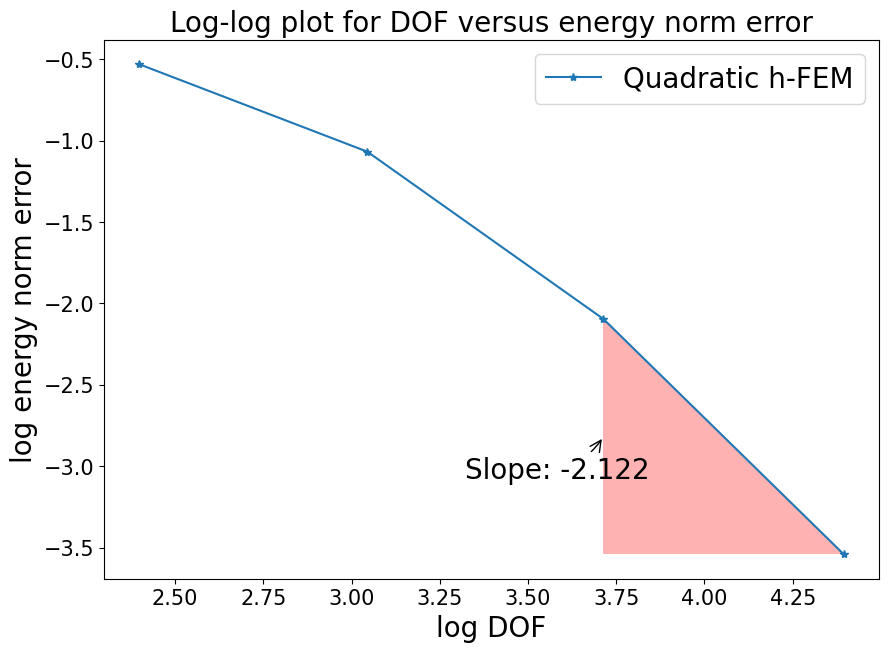

[0.5878048113211369,
 0.3435771911773624,
 0.12296050288380014,
 0.02900097941955352]

In [823]:

truncate = 0
log_DOFs_q = np.log(DOFs_q[truncate:])
log_error_list_q = np.log(error_list_q[truncate:])

plt.figure(figsize=(10, 7)) 
plt.plot(log_DOFs_q, log_error_list_q, '*-', label='Quadratic h-FEM')

slope_q, _ = np.polyfit(log_DOFs_q, log_error_list_q, 1)
rate_q = (np.log(error_list_q[-1]) - np.log(error_list_q[-2])) / (np.log(DOFs_q[-1]) - np.log(DOFs_q[-2]))

# plt.annotate(f'slope = {slope_q:.2f}', xy=(0.6, 0.3), xycoords='axes fraction', color='blue',fontsize = fontsize)
draw_triangle_and_annotate(DOFs_q, error_list_q, rate_q)

# Labels, title, and legend
plt.xlabel('log DOF', fontsize=fontsize)
plt.xticks(fontsize = 0.75*fontsize)
plt.yticks(fontsize = 0.75*fontsize)
plt.ylabel('log energy norm error', fontsize=fontsize)
plt.title('Log-log plot for DOF versus energy norm error', fontsize=fontsize)
plt.legend(fontsize=fontsize)

plt.savefig('/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_2D/images/Q1/logDOF_q_4.png')
plt.show()

error_list_q[truncate:]

p-FEM

In [812]:
DOFs_p = []
error_list_p = []
solution_p = []
cont_K_list_p = []
p_list = [1, 2, 3,4 ,5]
for p in p_list:
    U_p, phi_phip_p, uh_p, cont_K_p = FEM_1D(shape_class = Hierarchical,p = p, num_elems = 5, domain = domain,rhs_func = rhs_func,exact_func=exact_func, BCs = BCs, verbose = False)
    energy_fem_p = cal_energy(U_p, phi_phip_p)
    error_p = np.sqrt(abs(energy_fem_p-U_init)/U_init)
    DOFs_p.append(len(U_p))
    error_list_p.append(error_p)
    solution_p.append(uh_p)
    cont_K_list_p.append(cont_K_p)
print(cont_K_list_p)
print(DOFs_p)

[9.472135954999576, 9.472135954999576, 9.472135954999576, 9.472135954999576, 9.472135954999576]
[6, 11, 16, 21, 26]


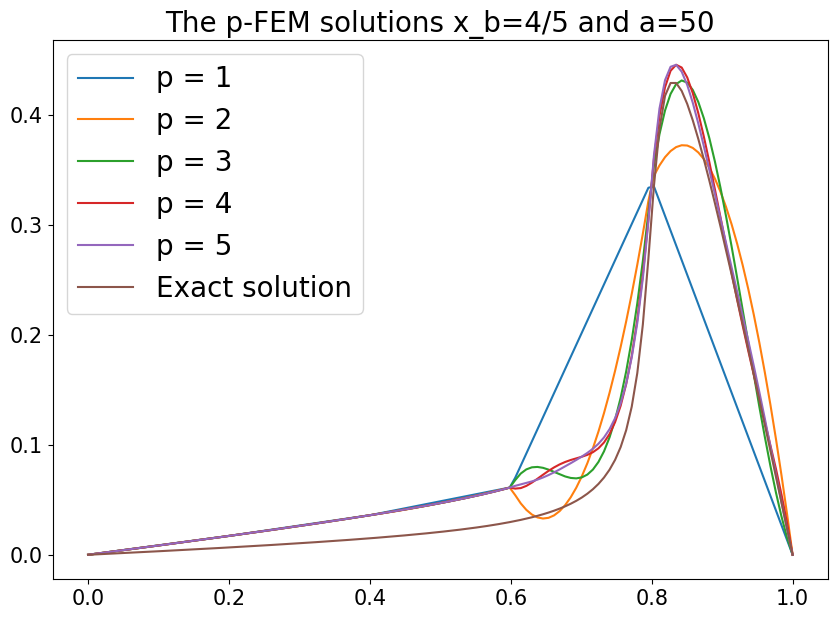

In [821]:
x_data = np.linspace(domain[0], domain[1], 128)

plt.figure(figsize=(10, 7)) 
for idx in range(len(solution_p)):
    # mesh_p = np.linspace(domain[0], domain[1], num_elems_list[idx]+1)
    mesh_p = np.linspace(domain[0], domain[1], 128)
    # print(mesh_l)s
    plt.plot(mesh_p, solution_p[idx](mesh_p), label='p = {} '.format(p_list[idx]))
plt.plot(x_data, exact_func(x_data), label='Exact solution')
plt.legend(fontsize=fontsize)
plt.title('The p-FEM solutions x_b=4/5 and a=50', fontsize=fontsize)
plt.xticks(fontsize = 0.75*fontsize)
plt.yticks(fontsize = 0.75*fontsize)
plt.savefig('/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_2D/images/Q1/Q1_5.png')

In [814]:
print(DOFs_p)
print(DOFs_q)

[6, 11, 16, 21, 26]
[11, 21, 41, 81]


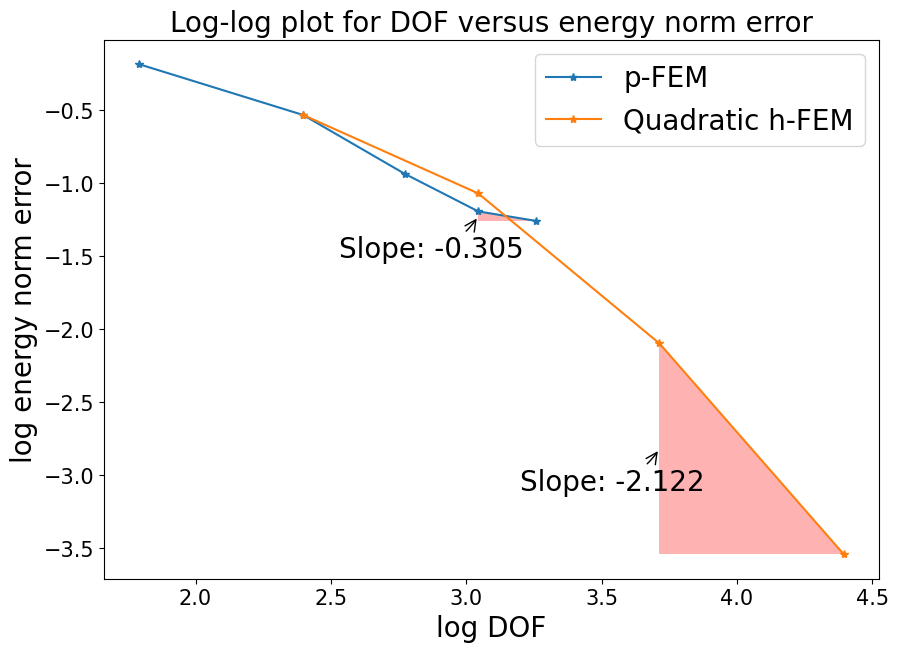

([6, 11, 16, 21, 26], [11, 21, 41, 81])

In [824]:

truncate = 0
log_DOFS_p = np.log(DOFs_p[truncate:])
log_error_list_p = np.log(error_list_p[truncate:])
plt.figure(figsize=(10, 7))
plt.plot(log_DOFS_p, log_error_list_p, '*-', label='p-FEM')

slope_p, _ = np.polyfit(log_DOFS_p, log_error_list_p, 1)
rate_p =(np.log(error_list_p[-1]) - np.log(error_list_p[-2])) / (np.log(DOFs_p[-1]) - np.log(DOFs_p[-2]))
rate_q =(np.log(error_list_q[-1]) - np.log(error_list_q[-2])) / (np.log(DOFs_q[-1]) - np.log(DOFs_q[-2]))

# plt.annotate(f'slope = {slope_p:.2f}', xy=(0.6, 0.5), xycoords='axes fraction', color='blue',fontsize = fontsize)
log_DOFS_q = np.log(DOFs_q[truncate:])
log_error_list_q = np.log(error_list_q[truncate:])

plt.plot(log_DOFS_q, log_error_list_q, '*-', label='Quadratic h-FEM')
draw_triangle_and_annotate(DOFs_q, error_list_q, rate_q)
draw_triangle_and_annotate(DOFs_p, error_list_p, rate_p)

slope_q, _ = np.polyfit(log_DOFS_q, log_error_list_q, 1)

# plt.annotate(f'slope = {slope_q:.2f}', xy=(0.6, 0.3), xycoords='axes fraction', color='orange',fontsize = fontsize)

plt.xlabel('log DOF', fontsize=fontsize)
plt.ylabel('log energy norm error', fontsize=fontsize)
plt.title('Log-log plot for DOF versus energy norm error', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xticks(fontsize = 0.75*fontsize)
plt.yticks(fontsize = 0.75*fontsize)
plt.savefig('/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_2D/images/Q1/h_p_error_5.png')
plt.show()

DOFs_p, DOFs_q

In [817]:
bugs

NameError: name 'bugs' is not defined

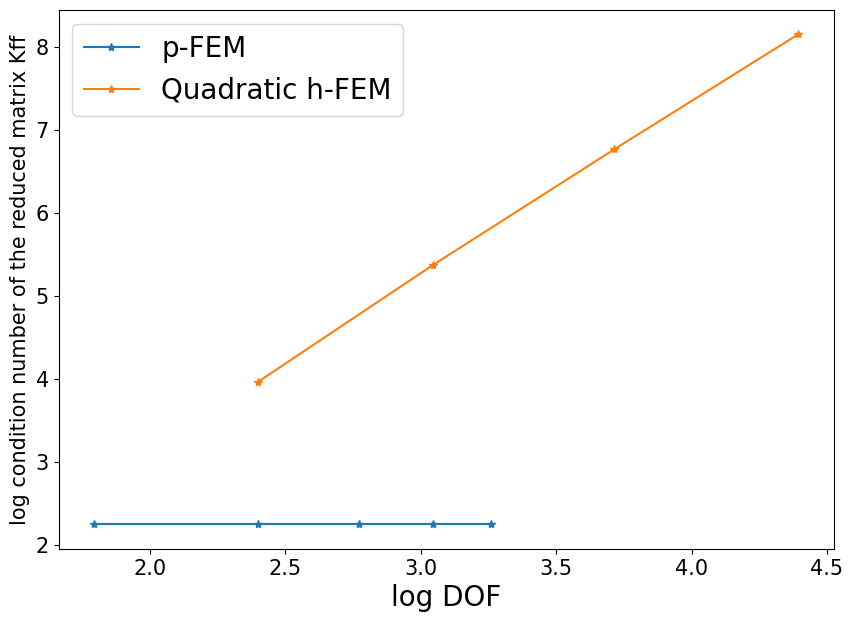

[2.24835443 2.24835443 2.24835443 2.24835443 2.24835443]


In [832]:

truncate = 0
log_DOFS_p = np.log(DOFs_p[truncate:])
log_cont_K_list_p = np.log(abs(np.array(cont_K_list_p[truncate:])))
plt.figure(figsize=(10, 7))
plt.plot(log_DOFS_p, log_cont_K_list_p, '*-', label='p-FEM')

log_DOFS_q = np.log(DOFs_q[truncate:])
log_cont_K_list_q = np.log(abs(np.array(cont_K_list_q[truncate:])))
plt.plot(log_DOFS_q, log_cont_K_list_q, '*-', label='Quadratic h-FEM')

plt.xlabel('log DOF', fontsize=fontsize)
plt.ylabel('log condition number of the reduced matrix Kff', fontsize=0.75*fontsize)
# plt.title('Log-log plot for condition number of the reduced matrix Kff versus energy norm error', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xticks(fontsize = 0.75*fontsize)
plt.yticks(fontsize = 0.75*fontsize)
plt.savefig('/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_2D/images/Q1/cont_K.png')
plt.show()
plt.show()
print(log_cont_K_list_p,)
